## Lab 7 z Podstaw Uczenia Maszynowego - Neuron
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time
from collections import defaultdict 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1])), 4)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1])), 4)

def plot_class(X_syn_test, X_pred_0, X_pred_1, model, method):
        x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
        y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.2)
        plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
        plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
        plt.title(f'Powierzchnia decyzyjna {method}')
        plt.xlabel('Cecha 1')
        plt.ylabel('Cecha 2')
        plt.legend()


def plot_class_poly(X_syn_test, X_pred_0, X_pred_1, model, method, poly):
    x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
    y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    Z1 = np.c_[xx.ravel(), yy.ravel()]
    ZP = poly.transform(Z1)
    Z = model.predict(ZP)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
    plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
    plt.title(f'Powierzchnia decyzyjna {method}')
    plt.xlabel('Cecha 1')
    plt.ylabel('Cecha 2')
    plt.legend()

In [231]:
class MNeuron:
    def __init__(self, eta=0.001, num_iterations=100, actv_func = 'logistic'):
        self.ETA = eta
        self.NUM_ITERATIONS = num_iterations
        self.theta = None
        self.y_pred_prob = None
        self.EPSILON = 0.01
        self.actv_func = actv_func
        

    def fit(self, X, y):
        _, num_features = X.shape
        self.theta = np.zeros(num_features)
        

        for i in range(self.NUM_ITERATIONS):
            linear_model = X @ self.theta
            y_predicted = self.activation_function(linear_model)
            

            epsilon = (y_predicted - y)
            dw = (epsilon * self.derivative_function(linear_model)) @ X
            self.theta -= self.ETA * dw
            if abs(statistics.mean(epsilon)) < self.EPSILON:
                break

# sin, tanh, ReLu, lRelu
    def predict(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.activation_function(linear_model)
        self.y_pred_prob = y_predicted_prob
        # print(f'y_pred: {y_predicted_prob}')
        if self.actv_func in ['sin', 'tanh', 'ReLu', 'lRelu']:
            y_predicted = [1 if i > 0 else 0 for i in y_predicted_prob]
        else:
            y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_prob]
        return np.array(y_predicted)
    
    def decision_function(self, X):
        linear_model = X @ self.theta
        y_predicted_prob = self.activation_function(linear_model)
        return np.array(y_predicted_prob)

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


    def logistic_activation(self, X):
        return 1 / (1 + np.exp(-X))
    def logistic_deriv(self, X):
        y = self.logistic_activation(X)
        return y * (1-y)
    
    
    def heaviside_activation(self, X):
        return np.where(X >= 0, 1, 0)
    def heaviside_deriv(self, X):
        return 1


    def sin_activation(self,X):
        return np.sin(X)
    def sin_deriv(self, X):
        return np.cos(X)


    def tanh_activation(self, X):
        return np.tanh(X)
    def tanh_deriv(self, X):
        return (1/(np.cosh(X)))**2


    def sign_activation(self, X):
        return np.where(X>=0, 1, -1)
    def sign_deriv(self, X):
        return 1

    
    def ReLu_activation(self, X):
        return np.maximum(0, X)
    def ReLu_deriv(self, X):
        return np.where(X >= 0, 1, 0)

    
    def lReLu_activation(self, X):
        return np.where(X > 0, X, 0.01*X)
    def lReLu_deriv(self, X):
        return np.where(X > 0, 1, 0.01)

    
    def activation_function(self, X):
        if self.actv_func == 'logistic':
            return self.logistic_activation(X)
        
        elif self.actv_func == 'heaviside':
            return self.heaviside_activation(X)
        
        elif self.actv_func == 'sin':
            return self.sin_activation(X)
        
        elif self.actv_func == 'tanh':
            return self.tanh_activation(X)
        
        elif self.actv_func == 'sign':
            return self.sign_activation(X)
        
        elif self.actv_func == 'ReLu':
            return self.ReLu_activation(X)
        
        elif self.actv_func == 'lReLu':
            return self.lReLu_activation(X)
        
        else:
            raise ValueError('Activation not supported')
        
    def derivative_function(self, X):
        if self.actv_func == 'logistic':
            return self.logistic_deriv(X)
        
        elif self.actv_func == 'heaviside':
            return self.heaviside_deriv(X)
        
        elif self.actv_func == 'sin':
            return self.sin_deriv(X)
        
        elif self.actv_func == 'tanh':
            return self.tanh_deriv(X)
        
        elif self.actv_func == 'sign':
            return self.sign_deriv(X)
        
        elif self.actv_func == 'ReLu':
            return self.ReLu_deriv(X)
        
        elif self.actv_func == 'lReLu':
            return self.lReLu_deriv(X)
        
        else:
            raise ValueError('Activation not supported')
        

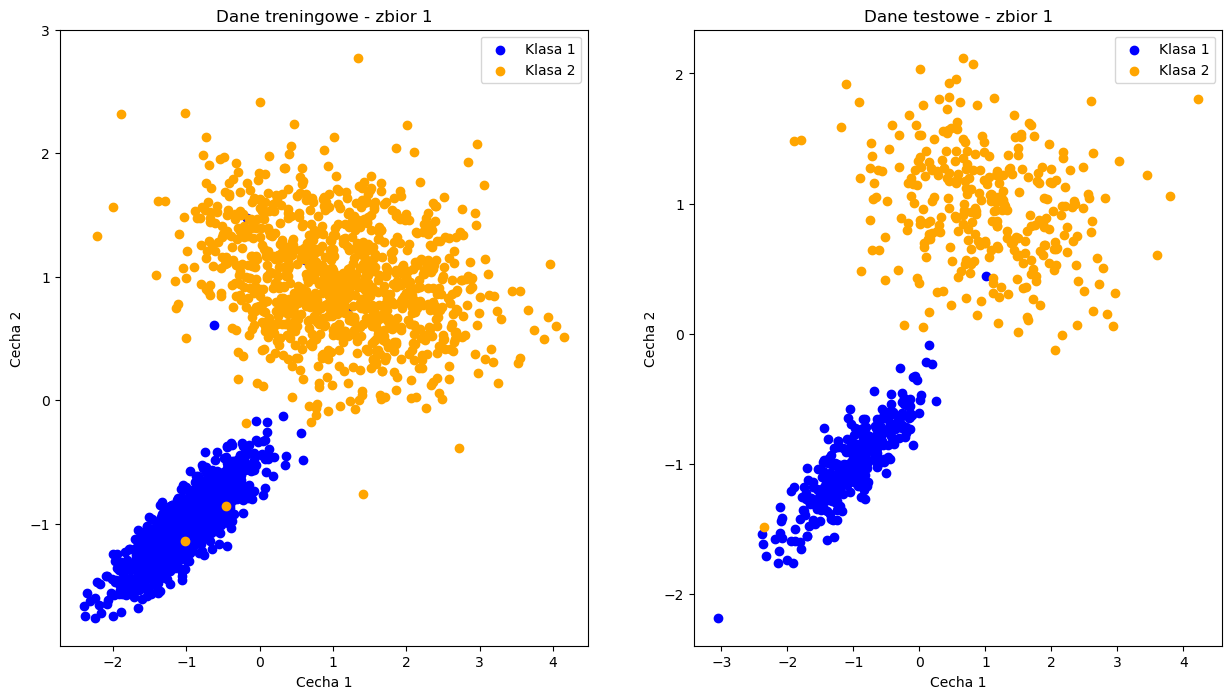

In [141]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=2, n_clusters_per_class=1, n_redundant=0, random_state=254397)
# X = scaler.fit_transform(X)
#Podzial na podzbiory
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X, t, test_size=0.25, random_state=254397)


# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_syn_train[(y_syn_train == 0)]
klasa_1_train = X_syn_train[(y_syn_train == 1)]
klasa_0_test = X_syn_test[(y_syn_test == 0)]
klasa_1_test = X_syn_test[(y_syn_test == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

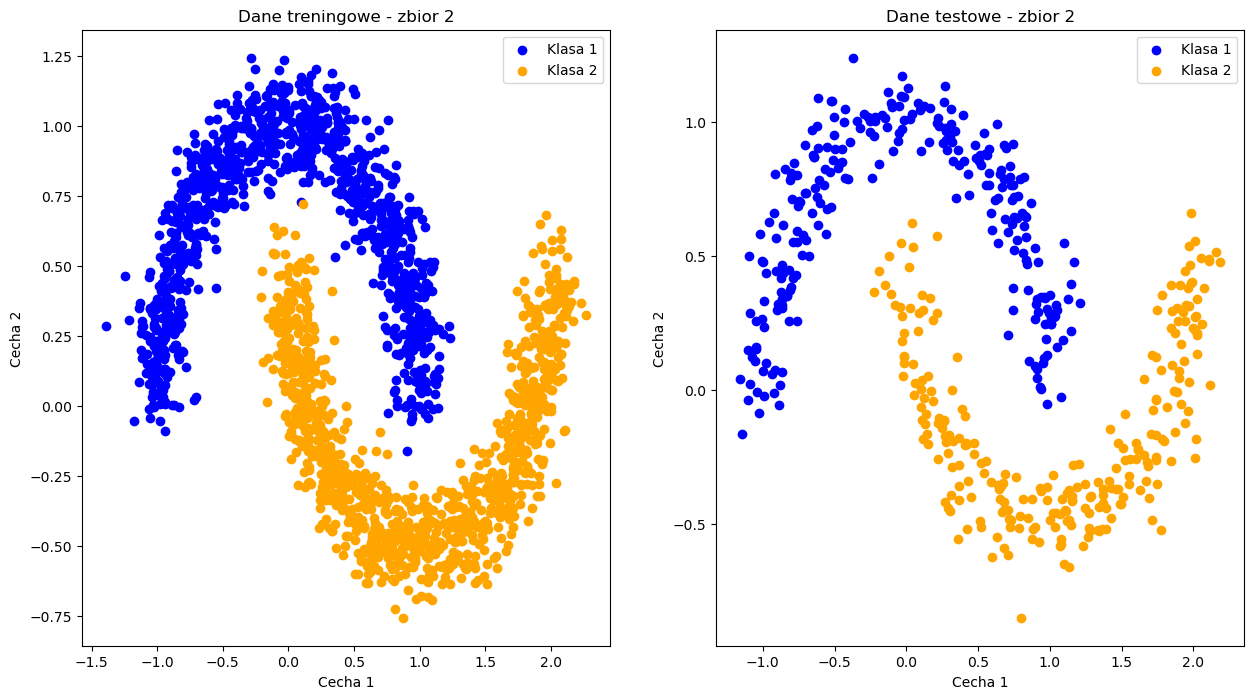

In [4]:
from sklearn.datasets import make_moons
# Dane wejsciowe
X_m, t_m = make_moons(n_samples=2597, random_state=254397, noise=0.1)

#Podzial na podzbiory
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_m, t_m, test_size=.2, random_state=254397)

# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train_M = X_train_M[(y_train_M == 0)]
klasa_1_train_M = X_train_M[(y_train_M == 1)]
klasa_0_test_M = X_test_M[(y_test_M == 0)]
klasa_1_test_M = X_test_M[(y_test_M == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train_M[:,0], klasa_0_train_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train_M[:,0], klasa_1_train_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test_M[:,0], klasa_0_test_M[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test_M[:,0], klasa_1_test_M[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 2")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

Sredni czas metody numerycznej: 0.0010894465446472169 s
Macierz pomylek: 
[[334   1]
 [  2 313]]
Dokladnosc: 0.9953846153846154
Czulosc: 0.997
Swoistosc: 0.9937
Sredni czas metody sklearn: 5.980730056762695e-05 s

Sklearn
Macierz pomylek: 
[[334   1]
 [  2 313]]
Dokladnosc: 0.9953846153846154
Czulosc: 0.997
Swoistosc: 0.9937


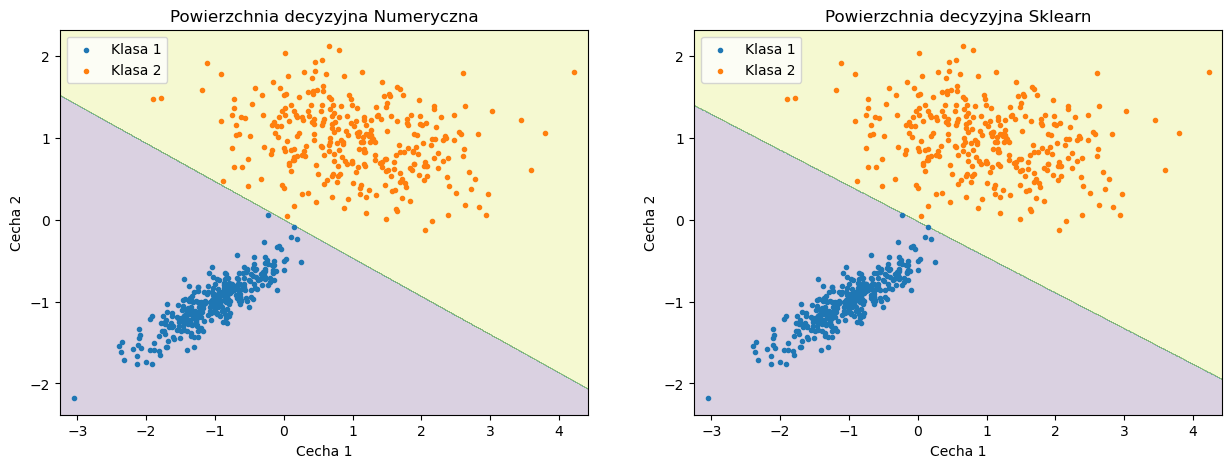

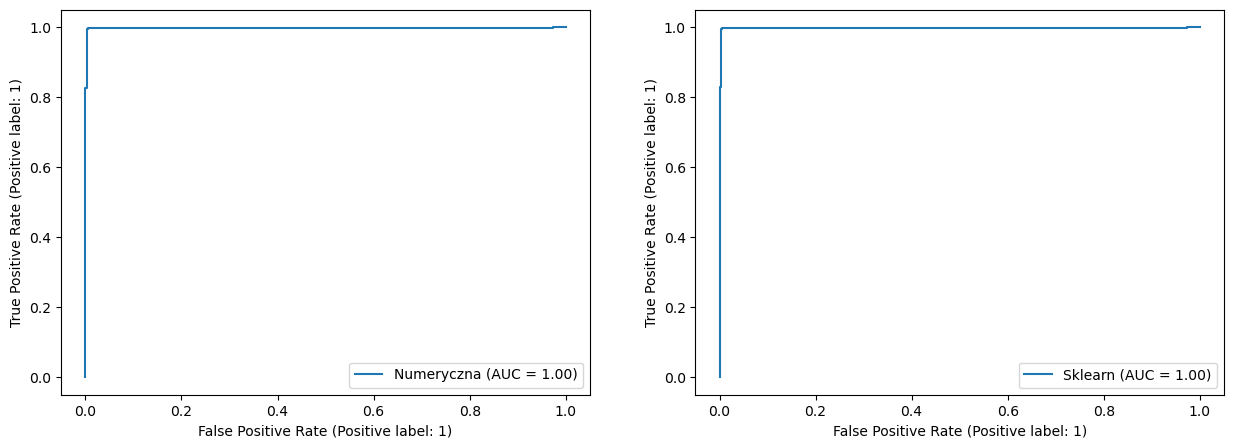

In [233]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

model = MNeuron(eta=0.001, num_iterations=100, actv_func='sin')
start = time.time()
model.fit(X_syn_train, y_syn_train)
for i in range(100):
    y_pred = model.predict(X_syn_test)
end = time.time()
print(f'Sredni czas metody numerycznej: {(end - start)/100} s')

accuracy = accuracy_score(y_syn_test, y_pred)
c_matrix = confusion_matrix(y_syn_test, y_pred)
print(f'Macierz pomylek: \n{c_matrix}')
print(f'Dokladnosc: {accuracy}\nCzulosc: {sensitivity(c_matrix)}\nSwoistosc: {specificity(c_matrix)}')
X_pred_0 = X_syn_test[y_pred == 0]
X_pred_1 = X_syn_test[y_pred == 1]


model_sk = LogisticRegression()
start = time.time()
model_sk.fit(X_syn_train, y_syn_train)
for i in range(100):
    y_pred_sk = model_sk.predict(X_syn_test)
end = time.time()
print(f'Sredni czas metody sklearn: {(end - start)/100} s')

accuracy_sk = accuracy_score(y_syn_test, y_pred_sk)
c_matrix_sk = confusion_matrix(y_syn_test, y_pred_sk)
print(f'\nSklearn\nMacierz pomylek: \n{c_matrix_sk}')
print(f'Dokladnosc: {accuracy_sk}\nCzulosc: {sensitivity(c_matrix_sk)}\nSwoistosc: {specificity(c_matrix_sk)}')
X_pred_0_sk = X_syn_test[y_pred_sk == 0]
X_pred_1_sk = X_syn_test[y_pred_sk == 1]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_class(X_syn_test, X_pred_0, X_pred_1, model, 'Numeryczna')
plt.subplot(1, 2, 2)
plot_class(X_syn_test, X_pred_0_sk, X_pred_1_sk, model_sk, 'Sklearn')


y_scores_sk = model_sk.decision_function(X_syn_test)
y_scores = model.decision_function(X_syn_test)

_, axs = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_predictions(y_syn_test, y_scores, name='Numeryczna', ax=axs[0])
RocCurveDisplay.from_predictions(y_syn_test, y_scores_sk, name='Sklearn', ax=axs[1])

Sredni czas metody numerycznej: 0.09973666429519654 s
Macierz pomylek: 
[[236  28]
 [ 33 223]]
Dokladnosc: 0.8826923076923077
Czulosc: 0.8939
Swoistosc: 0.8711
Sredni czas metody sklearn: 0.002765073776245117 s
Macierz pomylek: 
[[228  36]
 [ 25 231]]
Dokladnosc: 0.8826923076923077
Czulosc: 0.8636
Swoistosc: 0.9023


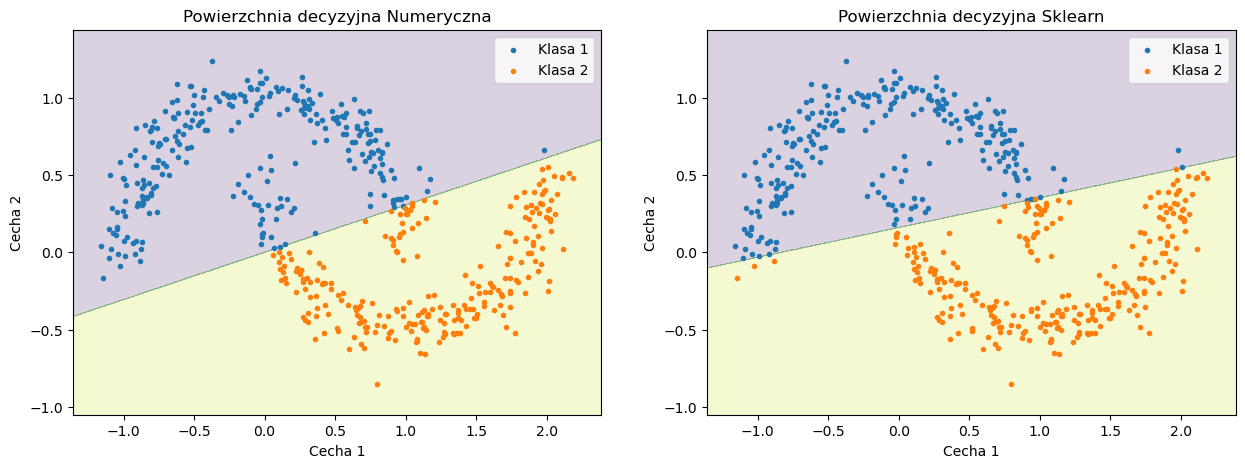

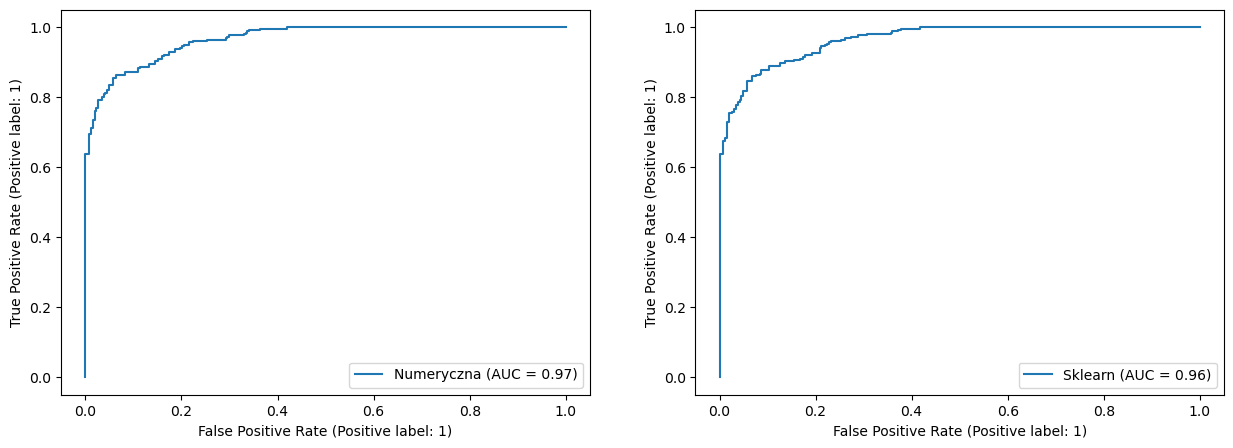

In [7]:
model_m = MNeuron(eta=0.01, num_iterations=100)
# poly_3 = PolynomialFeatures(3)

# XP_train_M = poly_3.fit_transform(X_train_M)
# XP_test_M = poly_3.transform(X_test_M)

start = time.time()
for i in range(100):
    model_m.fit(X_train_M, y_train_M)
    y_pred_m = model_m.predict(X_test_M)
end = time.time()
print(f'Sredni czas metody numerycznej: {(end - start)/100} s')

accuracy_m = accuracy_score(y_test_M, y_pred_m)
c_matrix_m = confusion_matrix(y_test_M, y_pred_m)
print(f'Macierz pomylek: \n{c_matrix_m}')
print(f'Dokladnosc: {accuracy_m}\nCzulosc: {sensitivity(c_matrix_m)}\nSwoistosc: {specificity(c_matrix_m)}')
X_pred_0_m = X_test_M[y_pred_m == 0]
X_pred_1_m = X_test_M[y_pred_m == 1]


model_m_sk = LogisticRegression()

start = time.time()
for i in range(100):
    model_m_sk.fit(X_train_M, y_train_M)
    y_pred_m_sk= model_m_sk.predict(X_test_M)
end = time.time()
print(f'Sredni czas metody sklearn: {(end - start)/100} s')

accuracy_m_sk = accuracy_score(y_test_M, y_pred_m_sk)
c_matrix_m_sk = confusion_matrix(y_test_M, y_pred_m_sk)
print(f'Macierz pomylek: \n{c_matrix_m_sk}')
print(f'Dokladnosc: {accuracy_m_sk}\nCzulosc: {sensitivity(c_matrix_m_sk)}\nSwoistosc: {specificity(c_matrix_m_sk)}')
X_pred_0_m_sk = X_test_M[y_pred_m_sk == 0]
X_pred_1_m_sk = X_test_M[y_pred_m_sk == 1]



plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_class(X_test_M, X_pred_0_m, X_pred_1_m, model_m, 'Numeryczna')
plt.subplot(1, 2, 2)
plot_class(X_test_M, X_pred_0_m_sk, X_pred_1_m_sk, model_m_sk, 'Sklearn')

y_scores_m = model_m.decision_function(X_test_M)
y_scores_m_sk = model_m_sk.decision_function(X_test_M)

_, axs = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_predictions(y_test_M, y_scores_m, name='Numeryczna', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_M, y_scores_m_sk, name='Sklearn', ax=axs[1])